In [33]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd # pip install pandas
from neuralNetworkClass import neuralNetwork
# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
from tensorflow import keras
from tensorflow.keras import layers

In [34]:
# https://archive.ics.uci.edu/ml/datasets/Auto+MPG
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

dataset = pd.read_csv(url, names=column_names, na_values='?',
                      comment='\t', sep=' ', skipinitialspace=True)

In [35]:
# clean data
dataset = dataset.dropna()

# convert categorical 'Origin' data into one-hot data
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1
dataset['Europe'] = (origin == 2)*1
dataset['Japan'] = (origin == 3)*1

In [36]:
# Split the data into train and test
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

print(dataset.shape, train_dataset.shape, test_dataset.shape)
train_dataset.columns

(392, 10) (314, 10) (78, 10)


Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'USA', 'Europe', 'Japan'],
      dtype='object')

In [37]:

# Define features and target
features = ['Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'USA', 'Europe', 'Japan']
target = 'MPG'

X_train = train_dataset[features].values
y_train = train_dataset[target].values
X_test = test_dataset[features].values
y_test = test_dataset[target].values

In [39]:
# Preprocess the data

# Initialize the model
model = neuralNetwork(input_dim=X_train.shape[1])

X_train_scaled, X_test_scaled = model.preprocess_data(X_train, X_test)

scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler.fit_transform(y_test.reshape(-1, 1)).flatten()


/Users/nikolauswieland/thesis/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.4294 - mae: 0.8256 - val_loss: 0.1946 - val_mae: 0.5085
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2018 - mae: 0.5086 - val_loss: 0.1605 - val_mae: 0.4380
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1497 - mae: 0.4266 - val_loss: 0.1182 - val_mae: 0.3643
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1326 - mae: 0.3855 - val_loss: 0.1020 - val_mae: 0.3261
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1080 - mae: 0.3360 - val_loss: 0.0818 - val_mae: 0.2849
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0814 - mae: 0.3006 - val_loss: 0.0741 - val_mae: 0.2663
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0945 - mae: 0.3087 - val_loss: 0.0773 - val_mae: 0.2879
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0899 - mae: 0.3094 - val_loss: 0.0725 - val_mae: 0.2690
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0748 - mae: 0.2850 - val_loss

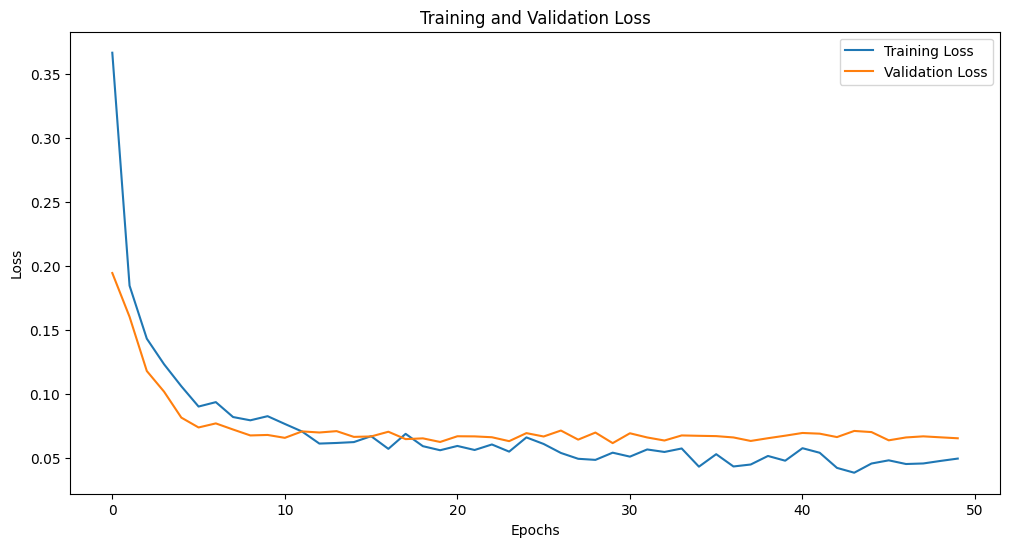

In [40]:
# Train the model
history = model.train(X_train_scaled, y_train_scaled, validation_split=0.2, epochs=50, batch_size=64)

In [41]:
# Predict on test data
predictions = model.predict(X_test_scaled)
predictions_original = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


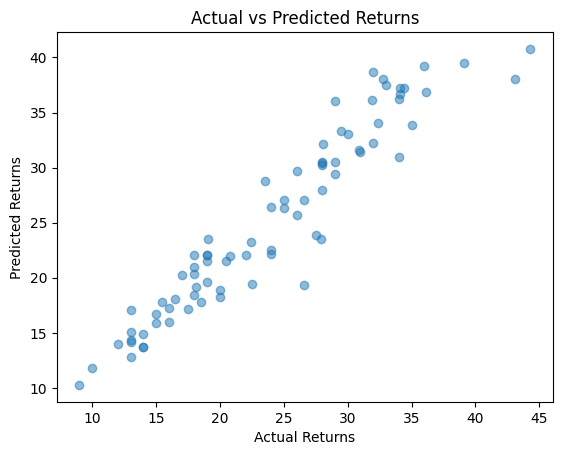

In [42]:
# Visualize actual vs predicted
import matplotlib.pyplot as plt
plt.scatter(y_test, predictions_original, alpha=0.5)
plt.title('Actual vs Predicted Returns')
plt.xlabel('Actual Returns')
plt.ylabel('Predicted Returns')
plt.show()